In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [32]:
from google.colab import drive
drive.mount('/gdrive')
#Repositorios
path = '/gdrive/MyDrive/Machine Learning Journey/Data_repository'
filename = "Online_Retail.csv"


fullpath = os.path.join(path, filename)

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [33]:
sales = pd.read_csv(fullpath, sep='|')

In [34]:
sales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 8:26,"2,55",17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 8:26,"3,39",17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 8:26,"2,75",17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 8:26,"3,39",17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 8:26,"3,39",17850.0,United Kingdom


In [35]:
sales['Description'] = sales['Description'].str.strip()
sales.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
sales['InvoiceNo'] = sales['InvoiceNo'].astype('str')

In [36]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  object 
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


In [37]:
#Numero de registros
sales.shape

(541909, 8)

In [38]:
sales.groupby(['Country'])['CustomerID'].agg(['count']).\
reset_index().sort_values('count', ascending=False)

,Country,count
36,United Kingdom,361878
14,Germany,9495
13,France,8491
10,EIRE,7485
31,Spain,2533
24,Netherlands,2371
3,Belgium,2069
33,Switzerland,1877
27,Portugal,1480
0,Australia,1259


In [39]:
sales = sales.loc[sales['Country']=='United Kingdom']

In [40]:
sales.shape

(495478, 8)

Eliminando registros perdidos (nulos)

In [41]:
sales = sales.dropna()

In [42]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 361878 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    361878 non-null  object 
 1   StockCode    361878 non-null  object 
 2   Description  361878 non-null  object 
 3   Quantity     361878 non-null  int64  
 4   InvoiceDate  361878 non-null  object 
 5   UnitPrice    361878 non-null  object 
 6   CustomerID   361878 non-null  float64
 7   Country      361878 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 24.8+ MB


In [43]:
sales.describe()

,Quantity,CustomerID
count,361878.000000,361878.000000
mean,11.077029,15547.871368
std,263.129266,1594.402590
min,-80995.000000,12346.000000
25%,2.000000,14194.000000
50%,4.000000,15514.000000
75%,12.000000,16931.000000
max,80995.000000,18287.000000


Eliminar pedidos cancelados. Es decir, debemos quedarnos con aquellos registros donde la columna "Quantity" sea mayor a cero

In [44]:
sales = sales[sales['Quantity']>0]

In [45]:
sales.shape

(354345, 8)

In [46]:
sales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 8:26,"2,55",17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 8:26,"3,39",17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 8:26,"2,75",17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 8:26,"3,39",17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 8:26,"3,39",17850.0,United Kingdom


In [47]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354345 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    354345 non-null  object 
 1   StockCode    354345 non-null  object 
 2   Description  354345 non-null  object 
 3   Quantity     354345 non-null  int64  
 4   InvoiceDate  354345 non-null  object 
 5   UnitPrice    354345 non-null  object 
 6   CustomerID   354345 non-null  float64
 7   Country      354345 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 24.3+ MB


Transformarmos las variables CustomerID y UnitPrice

In [48]:
# Convertir CustomerID a string
sales['CustomerID'] = sales['CustomerID'].astype(str)

# Reemplazar comas por puntos y convertir a float
sales['UnitPrice'] = sales['UnitPrice'].str.replace(',', '.').astype(float)

Añadimos la columna precio total, debe llamarse "TotalPrice".

In [49]:
sales['TotalPrice'] = sales['Quantity']*sales['UnitPrice']

In [50]:
sales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 8:26,3.39,17850.0,United Kingdom,20.34


Transformamos la columna InvoiceDate a formato fecha

In [51]:
sales['InvoiceDate'] = pd.to_datetime(sales['InvoiceDate'], dayfirst=True)

In [52]:
sales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


Calculamos la Resencia

In [53]:
sales['AnalysisDate'] = '2011/12/30'
sales['AnalysisDate'] = pd.to_datetime(sales['AnalysisDate'])

In [54]:
sales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,AnalysisDate
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2011-12-30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2011-12-30
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2011-12-30
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2011-12-30
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2011-12-30


In [55]:
sales['DaysBefore'] = (sales['AnalysisDate'] - sales['InvoiceDate']).dt.days

In [56]:
sales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,AnalysisDate,DaysBefore
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2011-12-30,393
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2011-12-30,393
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2011-12-30,393
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2011-12-30,393
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2011-12-30,393


In [57]:
sales['CustomerID'].nunique()

3921

In [58]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354345 entries, 0 to 541893
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     354345 non-null  object        
 1   StockCode     354345 non-null  object        
 2   Description   354345 non-null  object        
 3   Quantity      354345 non-null  int64         
 4   InvoiceDate   354345 non-null  datetime64[ns]
 5   UnitPrice     354345 non-null  float64       
 6   CustomerID    354345 non-null  object        
 7   Country       354345 non-null  object        
 8   TotalPrice    354345 non-null  float64       
 9   AnalysisDate  354345 non-null  datetime64[ns]
 10  DaysBefore    354345 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(2), object(5)
memory usage: 32.4+ MB


In [59]:
recency_df = pd.DataFrame(sales.groupby('CustomerID')['DaysBefore'].min()).reset_index()

In [60]:
recency_df.columns = ['CustomerID', 'Recencia']

In [61]:
recency_df.head()

,CustomerID,Recencia
0,12346.0,345
1,12747.0,22
2,12748.0,20
3,12749.0,23
4,12820.0,23


In [62]:
recency_df.shape

(3921, 2)

Calculamos la Frecuencia

In [63]:
sales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,AnalysisDate,DaysBefore
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2011-12-30,393
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2011-12-30,393
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2011-12-30,393
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2011-12-30,393
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2011-12-30,393


In [64]:
dfSalesCustomer = sales.groupby(['CustomerID', 'InvoiceNo'])['StockCode'].count().reset_index()

In [65]:
dfSalesCustomer.head()

,CustomerID,InvoiceNo,StockCode
0,12346.0,541431,1
1,12747.0,537215,7
2,12747.0,538537,8
3,12747.0,541677,5
4,12747.0,545321,12


In [66]:
frecuency_df = dfSalesCustomer.groupby('CustomerID')['StockCode'].count().reset_index()
frecuency_df.columns = ['CustomerID', 'Frecuency']

In [67]:
frecuency_df.head()

,CustomerID,Frecuency
0,12346.0,1
1,12747.0,11
2,12748.0,210
3,12749.0,5
4,12820.0,4


In [68]:
recency_df.shape

(3921, 2)

Calculo del Monto

In [69]:
monetary_df = sales.groupby(['CustomerID'])['TotalPrice'].sum().reset_index()

In [70]:
monetary_df.head()

,CustomerID,TotalPrice
0,12346.0,77183.60
1,12747.0,4196.01
2,12748.0,33719.73
3,12749.0,4090.88
4,12820.0,942.34


Unimos los valores de RFM por CustomerID

In [71]:
rf_df = recency_df.merge(frecuency_df, how='inner')
rfm_df = rf_df.merge(monetary_df, how='inner')

In [72]:
rfm_df.shape

(3921, 4)

In [73]:
rfm_df.head()

,CustomerID,Recencia,Frecuency,TotalPrice
0,12346.0,345,1,77183.60
1,12747.0,22,11,4196.01
2,12748.0,20,210,33719.73
3,12749.0,23,5,4090.88
4,12820.0,23,4,942.34


In [74]:
rfm_df['Frecuency'].value_counts().sum()

3921

In [75]:
rfm_df['Frecuency'].describe()

count    3921.000000
mean        4.246111
std         7.205750
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       210.000000
Name: Frecuency, dtype: float64

In [76]:
rfm_df['qRecencia'] = pd.qcut(rfm_df['Recencia'], 3, labels=[1,2,3])
rfm_df['qFrecuency'] = pd.qcut(rfm_df['Frecuency'], 2, labels=[2,1])
rfm_df['qTotalPrice'] = pd.qcut(rfm_df['TotalPrice'], 3, labels=[3,2,1])

In [77]:
rfm_df.head()

,CustomerID,Recencia,Frecuency,TotalPrice,qRecencia,qFrecuency,qTotalPrice
0,12346.0,345,1,77183.60,3,2,1
1,12747.0,22,11,4196.01,1,1,1
2,12748.0,20,210,33719.73,1,1,1
3,12749.0,23,5,4090.88,1,1,1
4,12820.0,23,4,942.34,1,1,2


Escalando las variables

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
var_rfm = ['Recencia', 'Frecuency', 'TotalPrice']
var_ss = []
for var in var_rfm:
    scaler = StandardScaler()
    rfm_df['ss_'+var] = scaler.fit_transform(rfm_df[var].values.reshape(-1, 1))
    var_ss.append('ss_'+var)

In [80]:
rfm_df.describe()

,Recencia,Frecuency,TotalPrice,ss_Recencia,ss_Frecuency,ss_TotalPrice
count,3921.000000,3921.000000,3921.000000,3.921000e+03,3.921000e+03,3.921000e+03
mean,111.722265,4.246111,1863.910113,7.769579e-17,-4.711582e-17,9.966807e-18
std,99.528532,7.205750,7481.922217,1.000128e+00,1.000128e+00,1.000128e+00
min,20.000000,1.000000,0.000000,-9.216851e-01,-4.505464e-01,-2.491536e-01
25%,37.000000,1.000000,300.040000,-7.508580e-01,-4.505464e-01,-2.090465e-01
50%,70.000000,2.000000,651.820000,-4.192525e-01,-3.117506e-01,-1.620232e-01
75%,162.000000,5.000000,1575.890000,5.052234e-01,1.046366e-01,-3.850038e-02
max,393.000000,210.000000,259657.300000,2.826462e+00,2.855777e+01,3.445990e+01


Running Kmeans

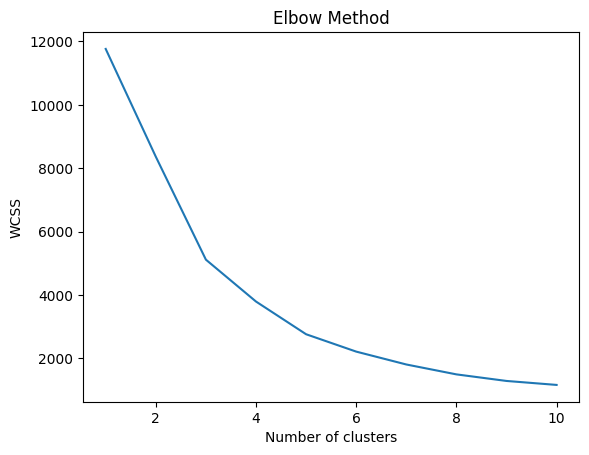

In [81]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(rfm_df[var_ss])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [82]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(rfm_df[var_ss])

rfm_df['cluster'] = kmeans.labels_

In [83]:
rfm_df['cluster'].value_counts()

cluster
4    2647
0     962
1     289
2      20
3       3
Name: count, dtype: int64

In [84]:
rfm_df.head()

,CustomerID,Recencia,Frecuency,TotalPrice,qRecencia,qFrecuency,qTotalPrice,ss_Recencia,ss_Frecuency,ss_TotalPrice,cluster
0,12346.0,345,1,77183.60,3,2,1,2.344127,-0.450546,10.068174,2
1,12747.0,22,11,4196.01,1,1,1,-0.901588,0.937411,0.311738,1
2,12748.0,20,210,33719.73,1,1,1,-0.921685,28.557767,4.258248,2
3,12749.0,23,5,4090.88,1,1,1,-0.891539,0.104637,0.297685,4
4,12820.0,23,4,942.34,1,1,2,-0.891539,-0.034159,-0.123189,4


In [85]:
rfm_df.groupby(['cluster']).agg({'Recencia': np.mean,
                                 'Frecuency': np.mean,
                                 'TotalPrice': np.mean}).reset_index()

,cluster,Recencia,Frecuency,TotalPrice
0,0,266.623701,1.559252,437.937402
1,1,36.044983,17.169550,7710.260727
2,2,41.200000,63.550000,51084.545500
3,3,22.666667,36.000000,207560.196667
4,4,64.322629,3.327541,1138.820900


In [86]:
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(rfm_df['Recencia'], rfm_df['Frecuency'], rfm_df['TotalPrice'],
           c=rfm_df['cluster'],s=60)

<Figure size 1600x900 with 0 Axes>

## DBSCAN

In [87]:
from sklearn.cluster import DBSCAN
cluster_dbscan = DBSCAN(
  eps = 0.10,
  metric="euclidean",
  min_samples = 10,
  n_jobs = -1)
clusters = cluster_dbscan.fit_predict(rfm_df[var_ss])

clusters

array([-1, 12, -1, ...,  2, -1,  4])

In [88]:
rfm_df['cluster_dbscan'] = clusters

In [89]:
rfm_df['cluster_dbscan'].value_counts()

cluster_dbscan
 1     1233
 2      704
-1      676
 4      410
 0      291
 7      175
 6       99
 5       94
 3       92
 8       50
 9       28
 10      21
 12      18
 14      13
 13      10
 11       7
Name: count, dtype: int64

In [90]:
rfm_df.groupby(['cluster_dbscan']).agg({'Recencia': np.mean, 'Frecuency': np.mean,
                                        'TotalPrice': np.mean}).reset_index()

,cluster_dbscan,Recencia,Frecuency,TotalPrice
0,-1,89.693787,12.050296,7071.622324
1,0,54.948454,4.000000,1201.575742
2,1,158.576642,1.000000,307.723253
3,2,103.980114,2.000000,581.003523
4,3,35.195652,7.000000,2164.122283
5,4,77.585366,3.000000,875.420149
6,5,34.712766,6.000000,1830.321277
7,6,385.656566,1.000000,249.909596
8,7,45.457143,5.000000,1564.143943
9,8,30.880000,8.000000,2448.343000


In [91]:
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(rfm_df['Recencia'], rfm_df['Frecuency'], rfm_df['TotalPrice'], c=rfm_df['cluster_dbscan'],s=60)

<Figure size 1600x900 with 0 Axes>